# MODELOS DE MACHINE LEARNING APLICADOS A LA PREDICCIÓN DE VENTAS DE SEGURO PARA AUTOMOVILES

# 1. Importamos las librerias

In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.svm import SVC 
import os
import warnings
warnings.filterwarnings('ignore')

# 2. Importamos los datos

**Vamos a utilizar un análisis predictivo para analizar a los clientes mas importantes y rentables y como estos interactúan. Realizaremos acciones especificas para aumentar la respuesta, las retención y el crecimiento rentable de los clientes**

In [3]:
os.chdir('D:\MiniProyectos_Python\Car_Sales_Analysis')

In [4]:
miArchivo='WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv'
data=pd.read_csv(miArchivo)

In [5]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# 3. Analisis exploratorio de datos (EDA)

In [6]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [7]:
data.shape

(9134, 24)

In [8]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [9]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


Nuestro conjunto de datos tiene 9134 clientes con informacion sobre sus ingresos, educiacion, sexo, residencia, etc(income,education,gender,residence).Cada cliente posee un automovil y se le ofrece 4 tipos diferentes de seguros de automovil. El target de esa base de datos es la variable **Response**.La respuesta(Response) puede ser "Si"- el cliente acepta la oferta, y "No"-el cliente no acepta la oferta

**Verificamos valores perdidos**

In [10]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

Tenemos 0 valores perdidos, lo cual nos facilita mucho el analisis

## *_Gráficas_*

**Distribución de la target de acuerdo a los factores dados**

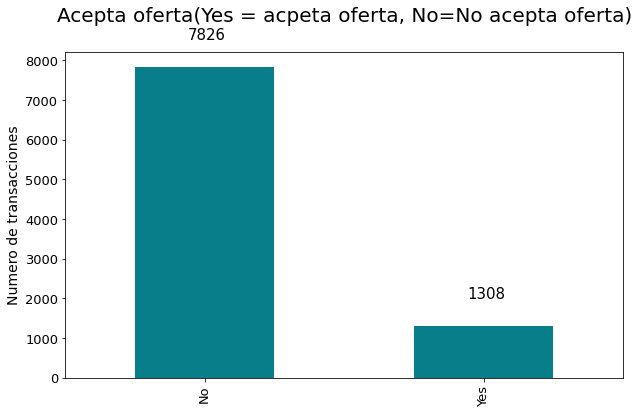

In [11]:
ax = data['Response'].value_counts().plot(kind='bar', figsize=(10,6), fontsize=13, color='#087E8B')
ax.set_title('Acepta oferta(Yes = acpeta oferta, No=No acepta oferta)',size=20,pad=30)
ax.set_ylabel('Numero de transacciones',fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19 , i.get_height() + 700, str(round(i.get_height(),2)),fontsize=15)

Tenemos un fuerte desbalance de la target y nos damos cuenta que la labor se esta realizando mal debido a que se cuentan con muy pocas ofertas aprobadas

**Vamos a visualizar que tipo de relación tienen los estados o la región con nuestra variable target (Responsive)**

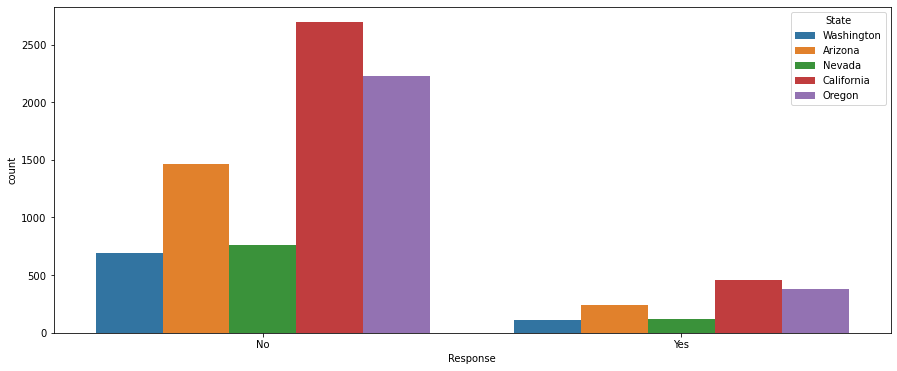

In [12]:
f, ax = plt.subplots(1, 1, figsize=(15,6))
sns.countplot("Response", hue="State",data=data)

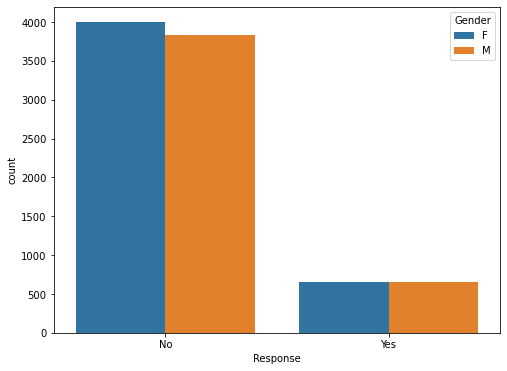

In [13]:
f, ax = plt.subplots(1, 1, figsize=(8,6))
sns.countplot("Response", hue="Gender",data=data)

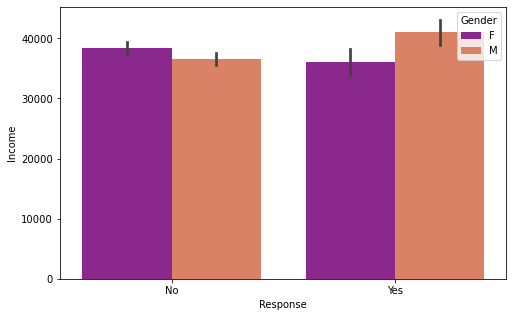

In [14]:
f, ax = plt.subplots(1, 1, figsize=(8,5))
ax= sns.barplot(x="Response", y="Income",hue="Gender",data=data, palette='plasma')

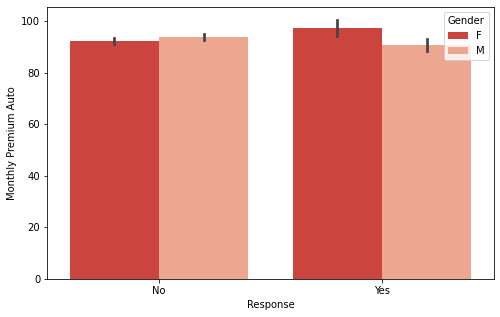

In [15]:
f, ax = plt.subplots(1, 1, figsize=(8,5))
ax= sns.barplot(x="Response", y="Monthly Premium Auto",hue="Gender",data=data, palette='Reds_r')

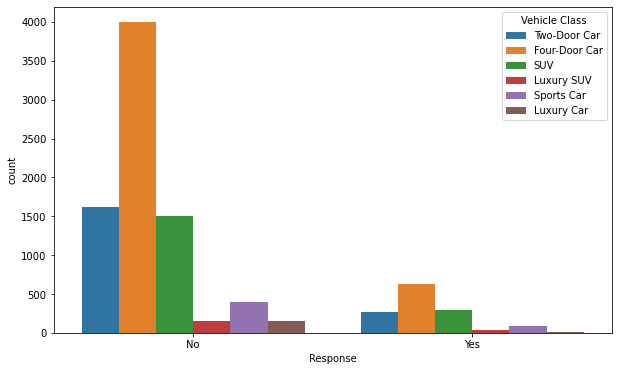

In [16]:
f, ax = plt.subplots(1, 1, figsize=(10,6))
sns.countplot("Response", hue="Vehicle Class",data=data)

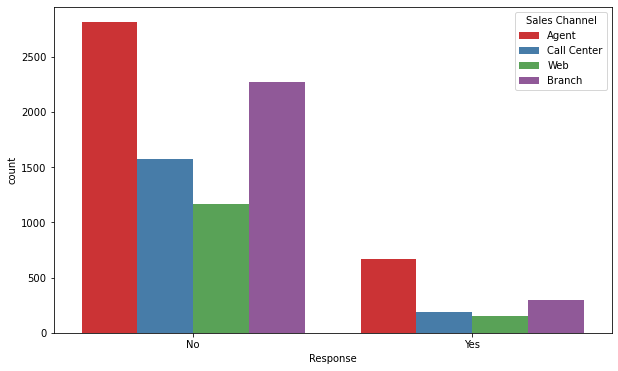

In [17]:
f, ax = plt.subplots(1, 1, figsize=(10,6))
sns.countplot("Response", hue="Sales Channel",data=data,palette='Set1')

In [18]:
data.Response.value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

Solo 1308 clientes aceptaron las ofertas

In [19]:
print("Solo", round((len(data[(data.Response=="Yes")])/len(data.Response)*100),2),"%"," de los clientes aceptaron las ofertas realizadas por el equipo de ventas")

Solo 14.32 %  de los clientes aceptaron las ofertas realizadas por el equipo de ventas


In [20]:
data.groupby("Sales Channel").agg({"Response":"count"})

,Response
Sales Channel,
Agent,3477
Branch,2567
Call Center,1765
Web,1325


La mayoria de las ofertas fueron realizadas por agentes(3477 ofertas) y la que tuvo menor oferta fue a traves del sitio web

In [21]:
channel = list(data["Sales Channel"].unique())
for i in channel:
    output = len (data[(data["Sales Channel"] ==i)&(data["Response"] =="Yes")]) / len(data[(data["Sales Channel"]==i)])
    print(round((output*100),2), "% de las ofertas del Canal de Ventas ",i, "fueron aceptadas.")

19.15 % de las ofertas del Canal de Ventas  Agent fueron aceptadas.
10.88 % de las ofertas del Canal de Ventas  Call Center fueron aceptadas.
11.77 % de las ofertas del Canal de Ventas  Web fueron aceptadas.
11.45 % de las ofertas del Canal de Ventas  Branch fueron aceptadas.


In [22]:
objects = ["State","Response","Coverage","Education","EmploymentStatus","Gender",
           "Location Code","Marital Status","Policy Type","Policy",
          "Renew Offer Type","Sales Channel", "Vehicle Class", "Vehicle Size"]
for obj in objects:
    print("* ",obj," *")
    print(data[obj].value_counts())
    print(" ")
    

*  State  *
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
 
*  Response  *
No     7826
Yes    1308
Name: Response, dtype: int64
 
*  Coverage  *
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
 
*  Education  *
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
 
*  EmploymentStatus  *
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64
 
*  Gender  *
F    4658
M    4476
Name: Gender, dtype: int64
 
*  Location Code  *
Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64
 
*  Marital Status  *
Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64
 
*  Policy Type  *
Personal Auto     6788
Corporate Auto

**Resultados**

Todas las caracteristicas categoricas estan bien distribuidas, asi que las guardaré y las codificaremos en datos numericos.

Algunas variables que tenemos en nuetro conjunto de datos no son tan importantes, por ejemplo el customer, policy es la misma que policy type, la fecha .

Los datos no estan equilibrados con respecto a la variable respuesta.

# 4. Analisis de la data

In [23]:
data = data.drop(columns={"Customer","Policy","Effective To Date"})

In [24]:
# Creamos una lista de las variables categoricas
data_categorica=data.select_dtypes(include=["object"])
categorias=list(data_categorica.columns)
categorias

['State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

In [25]:
#Convertimos las variables categoricas en numericas empleando LabelEncoder
lb=LabelEncoder()

for i in categorias:
    data[i]=lb.fit_transform(data[i])

In [26]:
data.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,4,2763.519279,0,0,0,1,0,56274,1,1,...,32,5,0,1,0,0,0,384.811147,5,1
1,0,6979.535903,0,1,0,4,0,0,1,2,...,13,42,0,8,1,2,0,1131.464935,0,1
2,2,12887.431650,0,2,0,1,0,48767,1,1,...,18,38,0,2,1,0,0,566.472247,5,1
3,1,7645.861827,0,0,0,4,1,0,1,1,...,18,65,0,7,0,0,2,529.881344,3,1
4,4,2813.692575,0,0,0,1,1,43836,0,2,...,12,44,0,1,1,0,0,138.130879,0,1


**Creamos una matriz de correlación**

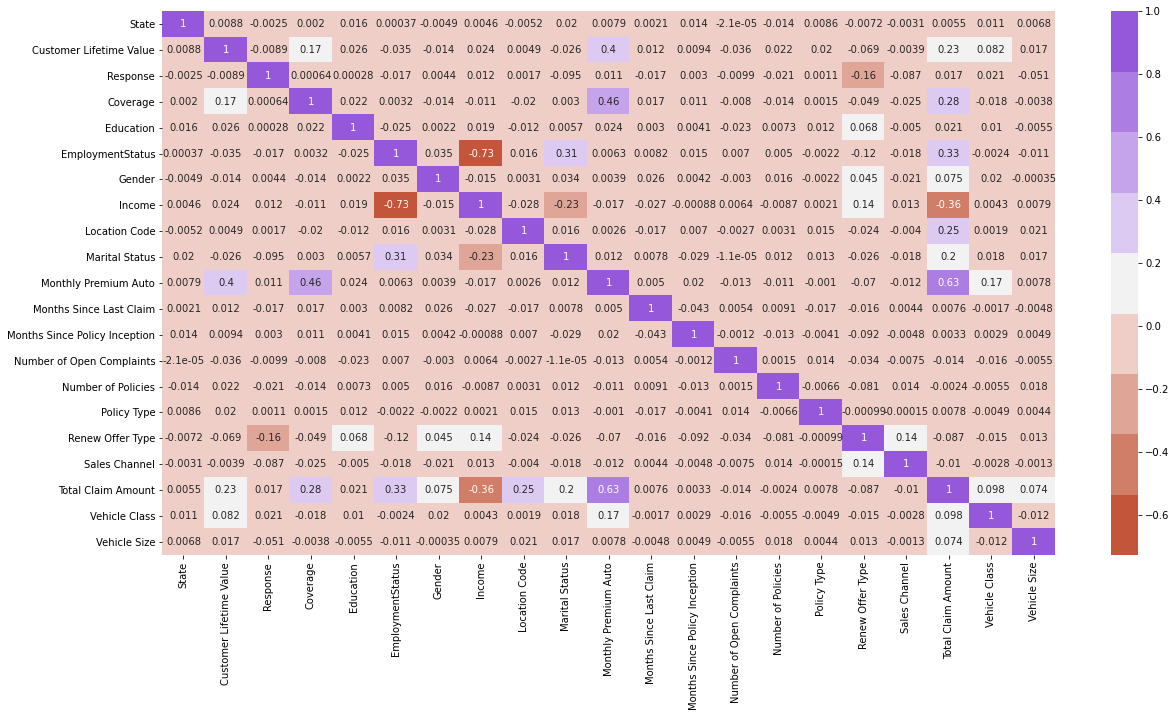

In [27]:
f, ax = plt.subplots(1,1,figsize=(20,10))
cmap = sns.diverging_palette(20,280,n=9)
ax= sns.heatmap(data.corr(),annot=True,cmap=cmap)

# **5. Supervised Machine Learning para datos no balanceados**

Empezaremos con la predicción de la respuesta de los futuros clientes. Para esto debemos encontrar un modelo adecuado. Dados que nuestros datos tiene un objetivo que se separa en SI y NO. Podemos usar la clasificación de los modelos de Machine Learning, iniciaremos usando los siguientes modelos:
#### **.Logistic Regression** 
#### **.KNeighbours Classifier**
#### **.Support Vector Machine**
#### **.Decision Tree** 

In [28]:
y=data['Response']

In [29]:
X=data.drop(["Response"],axis=1)

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X, 
                                                 y, 
                                                 test_size=0.2, 
                                                 random_state=29)

### **1.Modelo Regresion Logistica**

In [31]:
lr=LogisticRegression()
#Inicializamos el modelo

model_logistica=lr.fit(X_train,y_train)
#Entrenamos nuestro modelo con la data Train

y_pred = model_logistica.predict(X_test)

acc=lr.score(X_test,y_test)*100
#Comparando el test con la data 

print("Logistic Regression Test Accuracy: ",round(acc,2),'%')

Logistic Regression Test Accuracy:  84.95 %


### **Resultado**

In [32]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[1552    0]
 [ 275    0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1552
           1       0.00      0.00      0.00       275

    accuracy                           0.85      1827
   macro avg       0.42      0.50      0.46      1827
weighted avg       0.72      0.85      0.78      1827

0.849480021893815


### **2.Modelo K Neighbors**

In [34]:
knn=KNeighborsClassifier(n_neighbors=2) # n_neighbors means k
knn.fit(X_train,y_train)

#prediction=knn.predict(X_test)

y_pred_knn = knn.predict(X_test)

acc = knn.score(X_test,y_test)*100
print("2 neighbors KNN score: ",round(acc,2),"%")

2 neighbors KNN score:  96.93 %


In [35]:
print(confusion_matrix(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))
print(accuracy_score(y_test,y_pred_knn))

[[1501   51]
 [   5  270]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1552
           1       0.84      0.98      0.91       275

    accuracy                           0.97      1827
   macro avg       0.92      0.97      0.94      1827
weighted avg       0.97      0.97      0.97      1827

0.9693486590038314


### **3.Support Vector Machine(SVM)**

In [36]:
svm=SVC()
svm.fit(X_train,y_train)

y_pred_svc=svm.predict(X_test)
acc= svm.score(X_test,y_test)*100
print("SVM Algorithm Test Accuracy",round(acc,2),"%")

SVM Algorithm Test Accuracy 84.95 %


In [37]:
print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))
print(accuracy_score(y_test,y_pred_svc))

[[1552    0]
 [ 275    0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1552
           1       0.00      0.00      0.00       275

    accuracy                           0.85      1827
   macro avg       0.42      0.50      0.46      1827
weighted avg       0.72      0.85      0.78      1827

0.849480021893815


### **4.Arbol de Decisión**

In [38]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

#prediccion
y_pred_dtc=dtc.predict(X_test)

acc=dtc.score(X_test,y_test)*100
print("Decision Tree Test Accuracy: ",round(acc,2),"%")

Decision Tree Test Accuracy:  96.11 %


In [39]:
print(confusion_matrix(y_test,y_pred_dtc))
print(classification_report(y_test,y_pred_dtc))
print(accuracy_score(y_test,y_pred_dtc))

[[1482   70]
 [   1  274]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1552
           1       0.80      1.00      0.89       275

    accuracy                           0.96      1827
   macro avg       0.90      0.98      0.93      1827
weighted avg       0.97      0.96      0.96      1827

0.9611384783798577


### **Resultados**

Los modelos tienen una precisión realmente alta, el modelo de KNN parece ser la mejor decisión para usar con más del 96% de precisión, pero esto se debe a que los datos que hemos trabajado hasta el momento no estan balanceados. La variable response tiene como respuesta con "No" un porcentaje del 86%. por lo que el modelo no es de mucha utilidad y no da una visión muy precisa de los datos.

# 6.Supervised Machine Learning para datos balanceados